In [1]:
import pandas as pd

In [2]:
# pip install git+https://github.com/frlender/muldataframe.git
import muldataframe as md

In [3]:
meta = pd.read_csv('TCGA.PRAD.sampleMap_PRAD_clinicalMatrix',sep='\t',index_col=0)
data = pd.read_csv('TCGA.PRAD.sampleMap_HiSeqV2.gz',sep='\t',index_col=0)

In [4]:
meta2 = meta[['age_at_initial_pathologic_diagnosis',
              'pathologic_T','sample_type']]
meta2 = meta2.rename(columns={'age_at_initial_pathologic_diagnosis':'age','pathologic_T':'stage'})

In [5]:
# Only include 5 genes in this example.
# The values data frame is transposed to make printed data frames easier to read.
data2 = data.loc[['KLK3','PCA3','ERG','PTEN','CHD1']].transpose()
data2.columns.name = 'gene'

## Initialization
The MulDataFrame constructor takes up to three data frames as input: values, index, and columns. The index and columns data frames are optional. In this example, we provide a values and an index DataFrame. The constructor automatically uses the intersection of their indexes as the primary index.

In [6]:
mf = md.MulDataFrame(data2,index=meta2)

In [7]:
print(data2.shape, meta2.shape, mf.shape)

(550, 5) (566, 3) (550, 5)


You can access the three data frames through the `.index`, `.columns`, and `.df` attributes of the MulDataFrame object. The `.df` attribute specifically returns the values data frame. The `.values` attribute returns the values of the values data frame. Since no input was provided for `columns` in this example, the resulting columns data frame is empty, but its index still corresponds to the columns of the values data frame.

In [8]:
mf.index

,age,stage,sample_type
sampleID,,,
TCGA-2A-A8VL-01,51,T2b,Primary Tumor
TCGA-2A-A8VO-01,57,T3a,Primary Tumor
TCGA-2A-A8VT-01,47,T4,Primary Tumor
TCGA-2A-A8VV-01,52,T2b,Primary Tumor
TCGA-2A-A8VX-01,70,T3b,Primary Tumor
...,...,...,...
TCGA-ZG-A9M4-01,65,T3b,Primary Tumor
TCGA-ZG-A9MC-01,69,T3b,Primary Tumor
TCGA-ZG-A9N3-01,73,T3b,Primary Tumor


In [9]:
mf.columns

""
gene
KLK3
PCA3
ERG
PTEN
CHD1


In [10]:
mf.df

gene,KLK3,PCA3,ERG,PTEN,CHD1
sampleID,,,,,
TCGA-2A-A8VL-01,19.1629,8.4644,11.9903,10.3644,9.1404
TCGA-2A-A8VO-01,19.2607,14.3640,7.6609,10.6331,9.0857
TCGA-2A-A8VT-01,16.8638,6.1982,13.0764,10.6914,9.5660
TCGA-2A-A8VV-01,19.2036,12.0856,13.0030,10.6339,9.0853
TCGA-2A-A8VX-01,18.4583,14.8225,6.1908,10.6436,8.3102
...,...,...,...,...,...
TCGA-ZG-A9M4-01,14.4221,1.8331,7.9511,9.9380,9.4693
TCGA-ZG-A9MC-01,15.6036,4.3937,11.1014,10.1474,9.4568
TCGA-ZG-A9N3-01,14.7842,1.0196,11.4551,8.7182,9.0667


If the `MulDataFrame` object has a small number of columns, it will be neatly printed in the Python console

In [11]:
mf

(550, 5)                                   Empty DataFrame
                                           Columns: []
                                           Index: [KLK3, PCA3, ERG, PTEN, CHD1]
-----------------------------------------  -----------------------------------------------------------
                 age stage    sample_type  gene                KLK3     PCA3      ERG     PTEN    CHD1
sampleID                                   sampleID
TCGA-2A-A8VL-01   51   T2b  Primary Tumor  TCGA-2A-A8VL-01  19.1629   8.4644  11.9903  10.3644  9.1404
TCGA-2A-A8VO-01   57   T3a  Primary Tumor  TCGA-2A-A8VO-01  19.2607  14.3640   7.6609  10.6331  9.0857
TCGA-2A-A8VT-01   47    T4  Primary Tumor  TCGA-2A-A8VT-01  16.8638   6.1982  13.0764  10.6914  9.5660
TCGA-2A-A8VV-01   52   T2b  Primary Tumor  TCGA-2A-A8VV-01  19.2036  12.0856  13.0030  10.6339  9.0853
TCGA-2A-A8VX-01   70   T3b  Primary Tumor  TCGA-2A-A8VX-01  18.4583  14.8225   6.1908  10.6436  8.3102
...              ...   ...       

## Indexing
With the primary index and columns, values in a `MulDataFrame` object can be accessed with the `[]`, `.loc`, and `.iloc` operators, just as you would with a `pandas.DataFrame`.

In [15]:
mf['CHD1']

(550,)                                     Series([], Name: CHD1, dtype: float64)
-----------------------------------------  ----------------------------------------
                 age stage    sample_type                     CHD1
sampleID                                   sampleID
TCGA-2A-A8VL-01   51   T2b  Primary Tumor  TCGA-2A-A8VL-01  9.1404
TCGA-2A-A8VO-01   57   T3a  Primary Tumor  TCGA-2A-A8VO-01  9.0857
TCGA-2A-A8VT-01   47    T4  Primary Tumor  TCGA-2A-A8VT-01  9.5660
TCGA-2A-A8VV-01   52   T2b  Primary Tumor  TCGA-2A-A8VV-01  9.0853
TCGA-2A-A8VX-01   70   T3b  Primary Tumor  TCGA-2A-A8VX-01  8.3102
...              ...   ...            ...  ...                 ...
TCGA-ZG-A9M4-01   65   T3b  Primary Tumor  TCGA-ZG-A9M4-01  9.4693
TCGA-ZG-A9MC-01   69   T3b  Primary Tumor  TCGA-ZG-A9MC-01  9.4568
TCGA-ZG-A9N3-01   73   T3b  Primary Tumor  TCGA-ZG-A9N3-01  9.0667
TCGA-ZG-A9ND-01   55   T3a  Primary Tumor  TCGA-ZG-A9ND-01  6.3563
TCGA-ZG-A9NI-01   73   T3b  Primary Tumor  TC

In [73]:
mf.loc[['TCGA-2A-A8VO-01','TCGA-2A-A8VV-01'],['KLK3']]

(2, 1)                                     Empty DataFrame
                                           Columns: []
                                           Index: [KLK3]
-----------------------------------------  ------------------------
                 age stage    sample_type  gene                KLK3
sampleID                                   sampleID
TCGA-2A-A8VO-01   57   T3a  Primary Tumor  TCGA-2A-A8VO-01  19.2607
TCGA-2A-A8VV-01   52   T2b  Primary Tumor  TCGA-2A-A8VV-01  19.2036

In [74]:
mf.iloc[:2,:3]

(2, 3)                                     Empty DataFrame
                                           Columns: []
                                           Index: [KLK3, PCA3, ERG]
-----------------------------------------  ------------------------------------------
                 age stage    sample_type  gene                KLK3     PCA3      ERG
sampleID                                   sampleID
TCGA-2A-A8VL-01   51   T2b  Primary Tumor  TCGA-2A-A8VL-01  19.1629   8.4644  11.9903
TCGA-2A-A8VO-01   57   T3a  Primary Tumor  TCGA-2A-A8VO-01  19.2607  14.3640   7.6609

The index of a `MulDataFrame` object is a pandas data frame, allowing you to use standard pandas methods for analysis. For instance, you can use `.value_counts()` to inspect the unique values in its columns.

In [76]:
mf.index['stage'].value_counts()

stage
T2c              192
T3a              173
T3b              141
T2a               14
T4                13
T2b               10
[Discrepancy]      2
Name: count, dtype: int64

In [84]:
mf.index['sample_type'].value_counts()

sample_type
Primary Tumor          497
Solid Tissue Normal     52
Metastatic               1
Name: count, dtype: int64

## Multi-indexing
You can use `.mloc` to index the `MulDataFrame` object using the columns in the index data frame. `...` is used as a placeholder to select all values in a column. The example below selects all rows of the T2a stage.

In [77]:
mf.mloc[[...,'T2a']]

(14, 5)                                          Empty DataFrame
                                                 Columns: []
                                                 Index: [KLK3, PCA3, ERG, PTEN, CHD1]
-----------------------------------------------  ------------------------------------------------------------
                 age stage          sample_type  gene                KLK3     PCA3      ERG     PTEN     CHD1
sampleID                                         sampleID
TCGA-HC-7075-01   63   T2a        Primary Tumor  TCGA-HC-7075-01  19.6512  14.9734   6.2232  10.9212   9.1710
TCGA-HC-7080-01   66   T2a        Primary Tumor  TCGA-HC-7080-01  17.9963  14.8481   7.6173  10.3457   5.1874
TCGA-HC-7210-01   74   T2a        Primary Tumor  TCGA-HC-7210-01  19.1844  12.8047   8.3048   9.8000   9.7667
TCGA-HC-7212-01   56   T2a        Primary Tumor  TCGA-HC-7212-01  18.4791  14.7005  13.2451  10.3883  10.0012
TCGA-HC-7233-01   73   T2a        Primary Tumor  TCGA-HC-7233-01  17.7

To filter for only primary tumor samples from the T2a and T2b stages, excluding normal samples:

In [82]:
mf.mloc[[...,['T2a','T2b'],'Primary Tumor']]

(23, 5)                                    Empty DataFrame
                                           Columns: []
                                           Index: [KLK3, PCA3, ERG, PTEN, CHD1]
-----------------------------------------  ------------------------------------------------------------
                 age stage    sample_type  gene                KLK3     PCA3      ERG     PTEN     CHD1
sampleID                                   sampleID
TCGA-HC-7075-01   63   T2a  Primary Tumor  TCGA-HC-7075-01  19.6512  14.9734   6.2232  10.9212   9.1710
TCGA-HC-7080-01   66   T2a  Primary Tumor  TCGA-HC-7080-01  17.9963  14.8481   7.6173  10.3457   5.1874
TCGA-HC-7210-01   74   T2a  Primary Tumor  TCGA-HC-7210-01  19.1844  12.8047   8.3048   9.8000   9.7667
TCGA-HC-7212-01   56   T2a  Primary Tumor  TCGA-HC-7212-01  18.4791  14.7005  13.2451  10.3883  10.0012
TCGA-HC-7233-01   73   T2a  Primary Tumor  TCGA-HC-7233-01  17.7017  14.5470   7.6426  11.0203   9.6762
TCGA-HC-7748-01   60   T2a

The `.mloc` operator can also accept a dict object as an indexer, eliminating the need for `...` placeholders.

In [79]:
mf.mloc[{'sample_type':'Primary Tumor'}]

(497, 5)                                   Empty DataFrame
                                           Columns: []
                                           Index: [KLK3, PCA3, ERG, PTEN, CHD1]
-----------------------------------------  -----------------------------------------------------------
                 age stage    sample_type  gene                KLK3     PCA3      ERG     PTEN    CHD1
sampleID                                   sampleID
TCGA-2A-A8VL-01   51   T2b  Primary Tumor  TCGA-2A-A8VL-01  19.1629   8.4644  11.9903  10.3644  9.1404
TCGA-2A-A8VO-01   57   T3a  Primary Tumor  TCGA-2A-A8VO-01  19.2607  14.3640   7.6609  10.6331  9.0857
TCGA-2A-A8VT-01   47    T4  Primary Tumor  TCGA-2A-A8VT-01  16.8638   6.1982  13.0764  10.6914  9.5660
TCGA-2A-A8VV-01   52   T2b  Primary Tumor  TCGA-2A-A8VV-01  19.2036  12.0856  13.0030  10.6339  9.0853
TCGA-2A-A8VX-01   70   T3b  Primary Tumor  TCGA-2A-A8VX-01  18.4583  14.8225   6.1908  10.6436  8.3102
...              ...   ...       

The following example demonstrates how to use `.mloc` to index by the metadata in the columns data frame. A colon `:` is used as a placeholder for the row selection. The example also shows that selecting a single column returns a `MulSeries` object.

In [88]:
mft = mf.transpose()
mft.mloc[:, [..., ..., 'Metastatic']]

(5,)                                  sample_type      Metastatic
                                      stage                    T4
                                      age                      64
                                                  TCGA-V1-A9O5-06
------------------------------------  -----------------------------
Empty DataFrame                             TCGA-V1-A9O5-06
Columns: []                           gene
Index: [KLK3, PCA3, ERG, PTEN, CHD1]  KLK3          17.6674
                                      PCA3           3.2238
                                      ERG            7.7177
                                      PTEN           8.1360
                                      CHD1           9.7935

You can use `.nloc` for position-based selection. This is particularly useful when the index or columns data frame has duplicate column names. Negative indexing is also supported, following standard Python conventions.

In [97]:
mf.nloc[{2:'Primary Tumor'}]

(497, 5)                                   Empty DataFrame
                                           Columns: []
                                           Index: [KLK3, PCA3, ERG, PTEN, CHD1]
-----------------------------------------  -----------------------------------------------------------
                 age stage    sample_type  gene                KLK3     PCA3      ERG     PTEN    CHD1
sampleID                                   sampleID
TCGA-2A-A8VL-01   51   T2b  Primary Tumor  TCGA-2A-A8VL-01  19.1629   8.4644  11.9903  10.3644  9.1404
TCGA-2A-A8VO-01   57   T3a  Primary Tumor  TCGA-2A-A8VO-01  19.2607  14.3640   7.6609  10.6331  9.0857
TCGA-2A-A8VT-01   47    T4  Primary Tumor  TCGA-2A-A8VT-01  16.8638   6.1982  13.0764  10.6914  9.5660
TCGA-2A-A8VV-01   52   T2b  Primary Tumor  TCGA-2A-A8VV-01  19.2036  12.0856  13.0030  10.6339  9.0853
TCGA-2A-A8VX-01   70   T3b  Primary Tumor  TCGA-2A-A8VX-01  18.4583  14.8225   6.1908  10.6436  8.3102
...              ...   ...       

In [98]:
mf.nloc[{-1:'Primary Tumor'}]

(497, 5)                                   Empty DataFrame
                                           Columns: []
                                           Index: [KLK3, PCA3, ERG, PTEN, CHD1]
-----------------------------------------  -----------------------------------------------------------
                 age stage    sample_type  gene                KLK3     PCA3      ERG     PTEN    CHD1
sampleID                                   sampleID
TCGA-2A-A8VL-01   51   T2b  Primary Tumor  TCGA-2A-A8VL-01  19.1629   8.4644  11.9903  10.3644  9.1404
TCGA-2A-A8VO-01   57   T3a  Primary Tumor  TCGA-2A-A8VO-01  19.2607  14.3640   7.6609  10.6331  9.0857
TCGA-2A-A8VT-01   47    T4  Primary Tumor  TCGA-2A-A8VT-01  16.8638   6.1982  13.0764  10.6914  9.5660
TCGA-2A-A8VV-01   52   T2b  Primary Tumor  TCGA-2A-A8VV-01  19.2036  12.0856  13.0030  10.6339  9.0853
TCGA-2A-A8VX-01   70   T3b  Primary Tumor  TCGA-2A-A8VX-01  18.4583  14.8225   6.1908  10.6436  8.3102
...              ...   ...       

## Query
A key advantage of `MulDataFrame` is the ability to perform simultaneous queries on both the data and its metadata using the same pandas-style query syntax. The example below filters for rows where the patient's age is less than 50, the tumor stage is 'T3b', and the PTEN expression is greater than 10.

In [81]:
mf.query(index='age < 50 and stage == "T3b"', values='PTEN > 10')

(2, 5)                                     Empty DataFrame
                                           Columns: []
                                           Index: [KLK3, PCA3, ERG, PTEN, CHD1]
-----------------------------------------  -----------------------------------------------------------
                 age stage    sample_type  gene                KLK3     PCA3      ERG     PTEN    CHD1
sampleID                                   sampleID
TCGA-J4-8198-01   49   T3b  Primary Tumor  TCGA-J4-8198-01  18.3044  11.6918  12.8073  10.8820  9.8547
TCGA-YL-A9WJ-01   47   T3b  Primary Tumor  TCGA-YL-A9WJ-01  18.8855  12.2011   8.3440  10.6094  9.5439

## Groupby
A `MulDataFrame` object can be grouped by the metadata in the index or columns data frame. By default, when a `groupby` operation is followed by an aggregation method like `.mean()` or `.sum()`, the resulting `MulDataFrame` object's metadata will only retain columns with constant values within each group.

In [95]:
mf.nloc[{-1:'Primary Tumor'}].groupby('stage').mean()

(7, 5)                        Empty DataFrame
                              Columns: []
                              Index: [KLK3, PCA3, ERG, PTEN, CHD1]
----------------------------  -------------------------------------------------------------------
                 sample_type  gene                KLK3       PCA3        ERG       PTEN      CHD1
stage                         stage
T2a            Primary Tumor  T2a            18.784438  13.004662  10.125523  10.352477  8.898877
T2b            Primary Tumor  T2b            19.087260  12.542460  11.086480  10.234310  8.763670
T2c            Primary Tumor  T2c            18.733726  12.222616   9.346042  10.517148  9.010799
T3a            Primary Tumor  T3a            18.566313  11.673963   9.654830  10.330153  8.978813
T3b            Primary Tumor  T3b            17.947923  10.439493   9.777293  10.217233  9.099816
T4             Primary Tumor  T4             17.759600  11.226890   9.240220  10.405700  9.444070
[Discrepancy]  Primary Tu

This default behavior can be changed using the `agg_mode` argument. In the following example, `agg_mode='list'` ensures that all metadata columns are retained, with differing values within each group aggregated into lists.

In [96]:
mf.nloc[{-1:'Primary Tumor'}].groupby('stage',agg_mode='list').mean()

(7, 5)                                                               Empty DataFrame
                                                                     Columns: []
                                                                     Index: [KLK3, PCA3, ERG, PTEN, CHD1]
-------------------------------------------------------------------  -------------------------------------------------------------------
                                                             age  \  gene                KLK3       PCA3        ERG       PTEN      CHD1
stage                                                                stage
T2a             [63, 66, 74, 56, 73, 60, 50, 70, 61, 55, 59, 48]     T2a            18.784438  13.004662  10.125523  10.352477  8.898877
T2b                             [51, 52, 65, 55, 69, 60, 63, 70]     T2b            19.087260  12.542460  11.086480  10.234310  8.763670
T2c            [57, 73, 66, 64, 72, 63, 59, 47, 56, 50, 48, 4...     T2c            18.733726  12.222616 

## Survival Data Integration

In [15]:
sf = pd.read_csv('PRAD_survival.txt',index_col=0,sep='\t')

In [16]:
# combine clinical data and survival data
meta3 = pd.concat([meta2,sf[['OS','OS.time']]],axis=1)

In [17]:
mf2 = md.MulDataFrame(data2,index=meta3)

In [18]:
mf3 = mf2.mloc[{'sample_type':'Primary Tumor'}]

In [19]:
sum(mf3.index['OS'].isna())

0

### Pandas Methods
Most standard pandas methods are also available on `MulSeries` and `MulDataFrame` objects. The example below shows a `MulSeries` object calling the `.hist()` method, just like a `pandas.Series`, to generate a histogram of its values.

<Axes: >

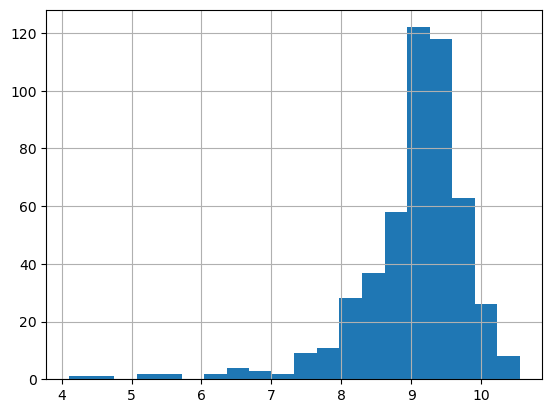

In [20]:
mf3['CHD1'].hist(bins=20)

### Direct Metadata Manipulation
The metadata in the index data frame can be directly modified. This allows for seamless, simultaneous analysis and manipulation of both the data and its associated metadata.

In [149]:
mf3.index['group'] = ['CHD1 low' if x < 10 else 'CHD1 high' for x in mf3['CHD1']]

/var/folders/fh/dw4ym82j08l67xt8ndms1f_c0000gn/T/ipykernel_38682/3132411239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mf3.index['group'] = ['CHD1 low' if x < 10 else 'CHD1 high' for x in mf3['CHD1']]


In [150]:
mf3

(497, 5)                                                          Empty DataFrame
                                                                  Columns: []
                                                                  Index: [KLK3, PCA3, ERG, PTEN, CHD1]
----------------------------------------------------------------  -----------------------------------------------------------
                 age stage    sample_type  OS  OS.time     group  gene                KLK3     PCA3      ERG     PTEN    CHD1
TCGA-2A-A8VL-01   51   T2b  Primary Tumor   0      621  CHD1 low  TCGA-2A-A8VL-01  19.1629   8.4644  11.9903  10.3644  9.1404
TCGA-2A-A8VO-01   57   T3a  Primary Tumor   0     1701  CHD1 low  TCGA-2A-A8VO-01  19.2607  14.3640   7.6609  10.6331  9.0857
TCGA-2A-A8VT-01   47    T4  Primary Tumor   0     1373  CHD1 low  TCGA-2A-A8VT-01  16.8638   6.1982  13.0764  10.6914  9.5660
TCGA-2A-A8VV-01   52   T2b  Primary Tumor   0      671  CHD1 low  TCGA-2A-A8VV-01  19.2036  12.0856  13.003

### KM Analysis
Because the multi-indexes of a MulDataFrame object are implemented as pandas data frames, they interoperate well with the many Python libraries that accept pandas data frames as input.

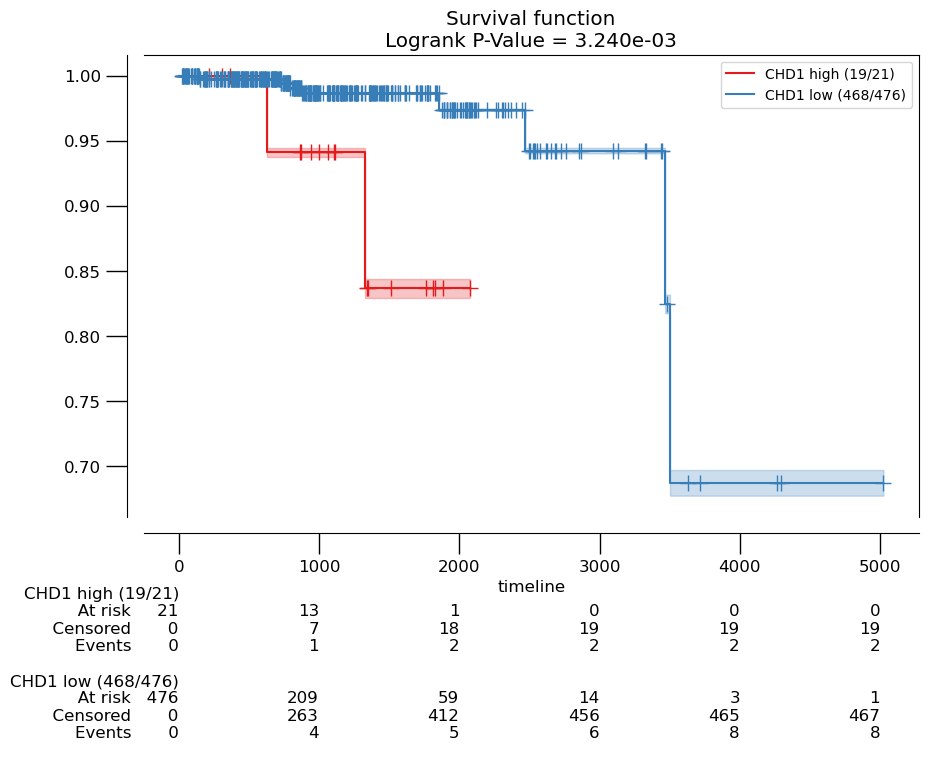

(<Figure size 1000x600 with 2 Axes>,
 <Axes: title={'center': 'Survival function\nLogrank P-Value = 3.240e-03'}, xlabel='timeline'>)

In [151]:
import kaplanmeier as km
res = km.fit(mf3.index['OS.time'], mf3.index['OS'], mf3.index['group'])
km.plot(res)

In [30]:
mf.rank()

(550, 5)                                   Empty DataFrame
                                           Columns: []
                                           Index: [KLK3, PCA3, ERG, PTEN, CHD1]
-----------------------------------------  --------------------------------------------------
                 age stage    sample_type  gene              KLK3   PCA3    ERG   PTEN   CHD1
sampleID                                   sampleID
TCGA-2A-A8VL-01   51   T2b  Primary Tumor  TCGA-2A-A8VL-01  441.0  115.0  398.0  171.0  260.0
TCGA-2A-A8VO-01   57   T3a  Primary Tumor  TCGA-2A-A8VO-01  466.0  499.0  160.0  276.0  234.0
TCGA-2A-A8VT-01   47    T4  Primary Tumor  TCGA-2A-A8VT-01   41.0   68.0  507.0  316.0  438.0
TCGA-2A-A8VV-01   52   T2b  Primary Tumor  TCGA-2A-A8VV-01  451.0  267.0  496.0  277.0  233.0
TCGA-2A-A8VX-01   70   T3b  Primary Tumor  TCGA-2A-A8VX-01  258.0  534.0   15.0  283.0   67.0
...              ...   ...            ...  ...                ...    ...    ...    ...    ...
TC